# Tesla Stock Market Prediction 

###                                                             - Busam Divya Prakash                          

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv(r'C:\Users\DIVYA PRAKASH\Desktop\Data Science\TSLA.csv')


In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900


In [5]:
dataset['Date'] = pd.to_datetime(dataset.Date)
dataset

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-01-07,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-02-07,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-06-07,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


In [12]:
dataset.shape

(2416, 6)

In [13]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [42]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Open    2416 non-null   float64       
 2   High    2416 non-null   float64       
 3   Low     2416 non-null   float64       
 4   Close   2416 non-null   float64       
 5   Volume  2416 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.4 KB


In [15]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [16]:
print(len(dataset))

2416


<AxesSubplot:>

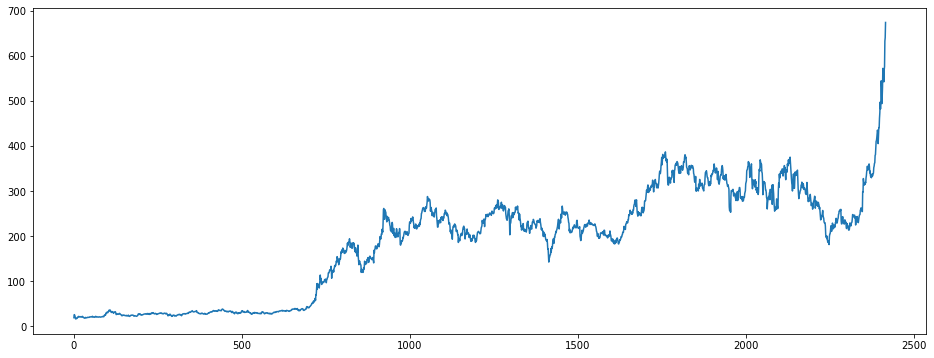

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [9]:
X_train.shape

(1812, 4)

In [10]:
X_test.shape

(604, 4)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [12]:
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print(regressor.coef_)

[-6.39634305e-01  9.11543017e-01  7.26604894e-01 -1.55475449e-08]


In [19]:
print(regressor.intercept_)

0.03439958011347244


In [14]:
predicted=regressor.predict(X_test)

In [15]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
...          ...         ...         ...       ...
1636  214.880005  222.250000  214.419998   5915700
1948  307.339996  307.589996  291.359985   8375200
2348  297.720001  330.000000  296.109985  30006100
1190  198.500000  200.500000  197.470001   2631600
359    32.490002   33.070000   31.629999    591100

[604 rows x 4 columns]


In [16]:
predicted.shape

(604,)

In [23]:
dframe=pd.DataFrame(y_test,predicted)

In [37]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [38]:
print(dfr)

          Actual   Predicted
124    30.090000   31.253574
1688  258.000000  255.654999
1397  204.990005  202.532384
6      17.459999   16.689894
1279  263.820007  265.429280
...          ...         ...
1222  236.800003  233.685818
215    26.440001   26.628928
536    31.170000   30.576112
1630  202.490005  201.294051
1548  222.929993  223.740777

[423 rows x 2 columns]


In [39]:
dfr.head(25)

,Actual,Predicted
124,30.090000,31.253574
1688,258.000000,255.654999
1397,204.990005,202.532384
6,17.459999,16.689894
1279,263.820007,265.429280
642,34.099998,34.061340
229,28.980000,28.000102
446,35.000000,34.933071
568,28.490000,28.229043
1110,246.720001,243.620755


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [27]:
regressor.score(X_test,y_test)

0.999703484441961

In [28]:
import math

In [29]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.0928260736454611


In [30]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 2.6595159843763505


In [31]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.630802251769463


In [40]:
graph=dfr.head(20)

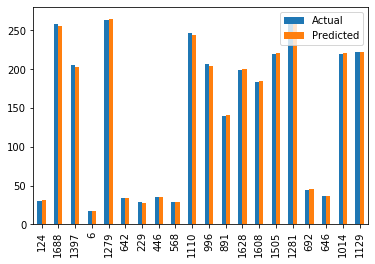

In [41]:
graph.plot(kind='bar')